In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [56]:
import re

REGEX_INRTO = "고객님은 길순님과 2022년 10월 16일부터 총 24893개의 메세지를 주고 받았습니다. "
REGEX_NEWLINE = "\n"
REGEX_DATE = "\d\d\d\d년 \d+월 \d+일 [월화수목금토일]요일"
REGEX_TIME_NAME = "\w\w \d+:\d+, \w\w : "


with open("messages.txt", "r") as f:
    example = f.read()
    
result = re.sub(REGEX_NEWLINE, " ", example)
result1 = re.sub(REGEX_INRTO+"|"+REGEX_DATE+"|"+REGEX_TIME, "", result)
print(result1)

# messages.txt
#고객님은 길순님과 2022년 10월 16일부터 총 24893개의 메세지를 주고 받았습니다. 
#
#
#
#
#2021년 12월 14일 화요일
#오전 11:01, 길동 : 안녕하세요~ 인천대학교 보드게임동아리
#마니또의 요정입니다🧞‍♀️
#2021 보인다 엠티 마니또 배정 결과를 발표합니다!
#오후 11:01, 길동 : 동영상
#오후 11:33, 길순 : 어마아앗
#오후 11:33, 길순 : 마니또인가요? ^^


<class 'str'>


In [53]:
from konlpy.tag import Okt
okt = Okt()

ko_doc_noun = okt.nouns(result1)

In [57]:
from collections import Counter

count_noun = Counter(ko_doc_noun)
count_noun.most_common(100)

[('태호', 929),
 ('누나', 604),
 ('응', 450),
 ('이모티콘', 431),
 ('햄무', 337),
 ('거', 320),
 ('나', 305),
 ('햄', 297),
 ('사진', 253),
 ('뭐', 221),
 ('말', 219),
 ('것', 197),
 ('지금', 196),
 ('때', 156),
 ('오늘', 156),
 ('그', 149),
 ('생각', 146),
 ('더', 143),
 ('그랭', 136),
 ('안', 135),
 ('내', 133),
 ('이', 132),
 ('사람', 123),
 ('좀', 119),
 ('해', 118),
 ('수', 112),
 ('아아', 111),
 ('왜', 102),
 ('오', 100),
 ('우리', 97),
 ('동방', 93),
 ('또', 90),
 ('이제', 90),
 ('기여', 89),
 ('잉', 89),
 ('응웅', 88),
 ('걸', 86),
 ('진짜', 85),
 ('내일', 83),
 ('자', 82),
 ('마쟈', 82),
 ('밥', 80),
 ('집', 78),
 ('수업', 78),
 ('헤', 78),
 ('바로', 75),
 ('무도', 75),
 ('일단', 73),
 ('게', 72),
 ('조', 71),
 ('뫄', 71),
 ('못', 70),
 ('개', 69),
 ('공부', 68),
 ('보고', 68),
 ('구', 67),
 ('그거', 66),
 ('무가', 66),
 ('알', 65),
 ('사실', 65),
 ('그냥', 61),
 ('윗', 60),
 ('여우', 60),
 ('잠', 59),
 ('사랑', 59),
 ('덜덜', 59),
 ('횐', 58),
 ('죠', 58),
 ('오키', 58),
 ('아가', 58),
 ('저', 56),
 ('난', 54),
 ('돈', 54),
 ('헤헤', 54),
 ('전', 53),
 ('애', 53),
 ('계속', 52),
 ('하나', 5

In [ ]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [9]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image


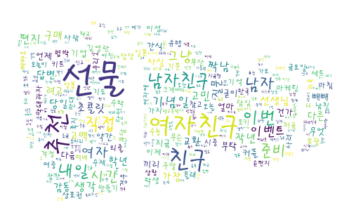

In [52]:

img_mask = np.array(Image.open('present.jpg'))

wc_img = WordCloud(background_color= 'white', max_words=2000, font_path= r'C:\Windows\Fonts\HMFMPYUN.ttf', mask = img_mask)
wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()